# *Electricity-Data-Pipeline*: Example 1
_Click_ [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/desenk/Electricity-Data-Pipeline/blob/master/Example_1_Quick_Functions.ipynb) _to open this notebook in Google Colab_


## 1. Clone the Electricity-Data-Pipeline project and download all required packages

In [ ]:
#Please comment out if you are NOT using Google Colab or Jupyter Notebook
!git clone https://github.com/desenk/Electricity-Data-Pipeline.git
%cd ./Electricity-Data-Pipeline
!pip install -r requirements.txt

Cloning into 'Electricity-Data-Pipeline'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (211/211), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 211 (delta 107), reused 186 (delta 92), pack-reused 0
Receiving objects: 100% (211/211), 337.31 KiB | 611.00 KiB/s, done.
Resolving deltas: 100% (107/107), done.
/content/Electricity-Data-Pipeline


## 2. Import the `Electricity-Data-Pipeline` modules

In [ ]:
from pipeline.BMRS_helpers import *
from pipeline.range_import_helpers import *
import matplotlib.pyplot as plt

## 3. Get your API key
Please ensure that you obtain an API key from Elexon following the instructions below (adapted from [here](https://www.elexon.co.uk/documents/training-guidance/bsc-guidance-notes/bmrs-api-and-data-push-user-guide-2/)):

1. Register [here](https://www.elexonportal.co.uk/registration/newuser?cachebust=3apx5qnzf9) as a new user 
> Check your inbox for the verification email
2. Sign-in & Access your API Key
> Log-in -> Click on `my profile` -> Copy the `scripting key`
3. Paste the API Key in the `api_key.txt` file (NO quotes or other characters - just the copied key)
> Google Colab: `folder icon` (on the left)>Electricity-Data-Pipeline>api_key.txt
4. Check that your API Key is saved correctly


In [ ]:
get_APIKey()

## 4. Import raw data using quick BMRS helper functions

### List of functions

Below is a list of all the `<Electricity-Data-Pipeline>` functions defined so far:

_**Table 1:** List of the quick BMRS helper functions_

`Electricity-Data-Pipeline` Quick Functions | Description | Resolution | Inputs 
------------ | ------------- | ------------ | ------------
**`demand()`** | Rolling System Demand | 5 min | demand(start_date = 'YYYY-MM-DD', end_date = 'YYYY-MM-DD', save_to_csv = False)
**`temperature()`** | Average Daily Temperature in Britain | Daily  | "
**`generation()`** | Half-hourly Generation by Fuel Type | Halfhourly (30 min) | "
**`frequency()`** | System Frequency | 15 sec | "
**`initial_demand_national()`** | Initial National Demand Out-turn | Halfhourly (30 min) | "
**`initial_demand_transmission()`** | Initial Transmission System Demand Out-turn | Halfhourly (30 min) | "
**`demand_forecast_national()`** | National Demand Forecast | Halfhourly (30 min) | "
**`demand_forecast_transmission()`** | Transmission System Demand Forecast | Halfhourly (30 min) | "
**`imbalance_volume()`** | Imbalance Volume | Halfhourly (30 min) | "
**`loss_of_load()`** | Loss of Load and De-rated Margin | Halfhourly (30 min) | "
**`imbalance_price()`** | Imbalance Price | Halfhourly (30 min) | "
**`derived_system_data()`** | Derived System Data | Halfhourly (30 min) | "
**`extract_data()`** | Uses BMRS data label and tries different methods | depends on dataset of choice | extract_data(report_name = 'TEMP', start_date = 'YYYY-MM-DD', end_date = 'YYYY-MM-DD', save_to_csv = True)

_______________________________________________


_**Table 2:** List of the data extractions functions for a week or longer periods._

`Electricity-Data-Pipeline` Function for Weekly/Long-term Imports | Description | Range | Inputs 
------------ | ------------- | ------------ | ------------
**`extract_data_weekly()`** | Extracts data for a week from the start_date using the function names from the table above| Fixed - Weekly | extract_data_weekly(func_name = demand , start_date = 'YYYY-MM-DD', save_to_csv = True)
**`extract_data_range()`** | Extracts data for long timeframes | Variable  | extract_data_range(func_name = temperature, start_date = 'YYYY-MM-DD', end_date =  'YYYY-MM-DD', save_to_csv = False)
**`extract_data_range_with_BMRS_label()`** | Same as above but using BMRS report names rather than the function names from the table above | Variable | data_extract_range_with_BMRS_label(report_name = 'TEMP', start_date = 'YYYY-MM-DD', end_date =  'YYYY-MM-DD', save_to_csv = False)

Here, we demonstrate the quick functions used for short-term data import (See Table 1).
Please note that these functions are subject to capping and time-out limits imposed by the data provider. Please look at the range import functions to overcome this (See Table 2).

### Demand example with default dates

In [ ]:
demand = demand()
demand

,recordType,settDate,publishingPeriodCommencingTime,fuelTypeGeneration,activeFlag
0,[[[VD]]],[[[2020-03-24]]],[[[00:00:00]]],[[[25223]]],[[[Y]]]
1,[[[VD]]],[[[2020-03-24]]],[[[00:05:00]]],[[[25348]]],[[[Y]]]
2,[[[VD]]],[[[2020-03-24]]],[[[00:10:00]]],[[[25357]]],[[[Y]]]
3,[[[VD]]],[[[2020-03-24]]],[[[00:15:00]]],[[[25306]]],[[[Y]]]
4,[[[VD]]],[[[2020-03-24]]],[[[00:20:00]]],[[[25190]]],[[[Y]]]
...,...,...,...,...,...
284,[[[VD]]],[[[2020-03-24]]],[[[23:40:00]]],[[[24780]]],[[[Y]]]
285,[[[VD]]],[[[2020-03-24]]],[[[23:45:00]]],[[[24698]]],[[[Y]]]
286,[[[VD]]],[[[2020-03-24]]],[[[23:50:00]]],[[[24611]]],[[[Y]]]
287,[[[VD]]],[[[2020-03-24]]],[[[23:55:00]]],[[[24584]]],[[[Y]]]


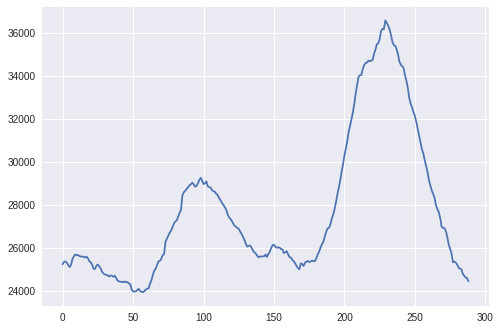

In [ ]:
%matplotlib inline
plt.style.use('seaborn')
plt.plot(demand['fuelTypeGeneration'])

### Generation example with custom dates & save_to_csv option enabled

In [ ]:
generation_default = generation() #default dates 
generation_default.head()

,recordType,startTimeOfHalfHrPeriod,settlementPeriod,ccgt,oil,coal,nuclear,wind,ps,npshyd,ocgt,other,intfr,intirl,intned,intew,biomass,intnem,intelec,intifa2,intnsl,activeFlag
0,[[[FUELHH]]],[[[2020-03-24]]],[[[1]]],[[[6094]]],[[[0]]],[[[0]]],[[[4319]]],[[[9415]]],[[[0]]],[[[424]]],[[[0]]],[[[122]]],[[[1510]]],[[[0]]],[[[758]]],[[[128]]],[[[1728]]],[[[756]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
1,[[[FUELHH]]],[[[2020-03-24]]],[[[2]]],[[[6126]]],[[[0]]],[[[0]]],[[[4319]]],[[[9681]]],[[[0]]],[[[423]]],[[[0]]],[[[123]]],[[[1508]]],[[[66]]],[[[758]]],[[[118]]],[[[1735]]],[[[756]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
2,[[[FUELHH]]],[[[2020-03-24]]],[[[3]]],[[[5867]]],[[[0]]],[[[0]]],[[[4246]]],[[[9806]]],[[[0]]],[[[426]]],[[[0]]],[[[124]]],[[[1508]]],[[[74]]],[[[758]]],[[[270]]],[[[1730]]],[[[756]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
3,[[[FUELHH]]],[[[2020-03-24]]],[[[4]]],[[[5452]]],[[[0]]],[[[0]]],[[[4149]]],[[[9926]]],[[[0]]],[[[425]]],[[[0]]],[[[125]]],[[[1508]]],[[[22]]],[[[758]]],[[[342]]],[[[1722]]],[[[756]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
4,[[[FUELHH]]],[[[2020-03-24]]],[[[5]]],[[[5124]]],[[[0]]],[[[0]]],[[[4143]]],[[[10053]]],[[[0]]],[[[422]]],[[[0]]],[[[125]]],[[[1410]]],[[[66]]],[[[710]]],[[[476]]],[[[1729]]],[[[708]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]


In [ ]:
#function(start_date = '2020-03-28', end_date = '2020-03-31, save_to_csv = True)
generation_custom = generation(start_date = '2020-03-28', end_date = '2020-03-31', save_to_csv = True)
generation_custom

saved FUELHH_2020-03-28_2020-03-31.csv


,recordType,startTimeOfHalfHrPeriod,settlementPeriod,ccgt,oil,coal,nuclear,wind,ps,npshyd,ocgt,other,intfr,intirl,intned,intew,biomass,intnem,intelec,intifa2,intnsl,activeFlag
0,[[[FUELHH]]],[[[2020-03-28]]],[[[1]]],[[[5385]]],[[[0]]],[[[0]]],[[[4359]]],[[[7094]]],[[[0]]],[[[488]]],[[[0]]],[[[143]]],[[[1606]]],[[[48]]],[[[804]]],[[[0]]],[[[2299]]],[[[806]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
1,[[[FUELHH]]],[[[2020-03-28]]],[[[2]]],[[[5534]]],[[[0]]],[[[0]]],[[[4354]]],[[[7085]]],[[[0]]],[[[506]]],[[[0]]],[[[142]]],[[[1606]]],[[[182]]],[[[802]]],[[[0]]],[[[2243]]],[[[804]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
2,[[[FUELHH]]],[[[2020-03-28]]],[[[3]]],[[[5705]]],[[[0]]],[[[0]]],[[[4355]]],[[[7032]]],[[[0]]],[[[510]]],[[[0]]],[[[150]]],[[[1410]]],[[[202]]],[[[682]]],[[[0]]],[[[2036]]],[[[668]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
3,[[[FUELHH]]],[[[2020-03-28]]],[[[4]]],[[[5273]]],[[[0]]],[[[0]]],[[[4355]]],[[[6962]]],[[[0]]],[[[508]]],[[[0]]],[[[155]]],[[[1408]]],[[[94]]],[[[680]]],[[[12]]],[[[1962]]],[[[668]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
4,[[[FUELHH]]],[[[2020-03-28]]],[[[5]]],[[[4997]]],[[[0]]],[[[0]]],[[[4357]]],[[[7178]]],[[[0]]],[[[504]]],[[[0]]],[[[156]]],[[[1408]]],[[[0]]],[[[680]]],[[[0]]],[[[1997]]],[[[664]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,[[[FUELHH]]],[[[2020-03-31]]],[[[44]]],[[[16922]]],[[[0]]],[[[337]]],[[[4193]]],[[[3202]]],[[[0]]],[[[662]]],[[[1]]],[[[160]]],[[[2004]]],[[[0]]],[[[1056]]],[[[0]]],[[[2692]]],[[[1000]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
186,[[[FUELHH]]],[[[2020-03-31]]],[[[45]]],[[[16098]]],[[[0]]],[[[265]]],[[[4190]]],[[[3193]]],[[[58]]],[[[565]]],[[[1]]],[[[159]]],[[[2004]]],[[[0]]],[[[1000]]],[[[0]]],[[[2107]]],[[[1000]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
187,[[[FUELHH]]],[[[2020-03-31]]],[[[46]]],[[[15198]]],[[[0]]],[[[0]]],[[[4191]]],[[[3260]]],[[[8]]],[[[559]]],[[[1]]],[[[159]]],[[[2004]]],[[[0]]],[[[1000]]],[[[0]]],[[[1854]]],[[[1000]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]
188,[[[FUELHH]]],[[[2020-03-31]]],[[[47]]],[[[14305]]],[[[0]]],[[[0]]],[[[4188]]],[[[3263]]],[[[0]]],[[[446]]],[[[1]]],[[[159]]],[[[1906]]],[[[0]]],[[[952]]],[[[0]]],[[[1439]]],[[[952]]],[[[0]]],[[[0]]],[[[0]]],[[[Y]]]


### Here is the rest of the functions, for you to try out:

```
demand()
temperature()
generation()
frequency()
loss_of_load()
initial_demand_national()
initial_demand_transmission()
demand_forecast_national()
demand_forecast_transmission()
imbalance_volume()
imbalance_price()
derived_system_data()
```

### Use case:
To see how ```Electricity-Data-Pipeline``` was employed for assesing the impact of the March 2020 COVID-19 lockdown on the electricity system, please visit our publication below:
> Kirli, Desen; Parzen, Maximilian; Kiprakis, Aristides. 2021. "Impact of the COVID-19 Lockdown on the Electricity System of Great Britain: A Study on Energy Demand, Generation, Pricing and Grid Stability" Energies 14, no. 3: 635. [https://doi.org/10.3390/en14030635](https://doi.org/10.3390/en14030635)

All data used in this paper lives here:
> Kirli, Desen; Kiprakis, Aristides; Parzen, Max. (2021). Impact of the COVID-19 Lockdown on the Electricity System of Great Britain: A Study on Energy Demand, Generation, Pricing and Grid Stability, 2019-2020 [dataset]. University of Edinburgh. School of Engineering. Institute for Energy Systems. [https://doi.org/10.7488/ds/2979](https://doi.org/10.7488/ds/2979).